<a href="https://colab.research.google.com/github/jeremypenafiel/cmsc-197/blob/main/197_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [364]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



# **STEP 1**
Load Advertising.csv dataset using pandas

In [365]:
sales_data_orig = pd.read_csv('sample_data/Advertising.csv')
sales_data_orig

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# **Step 3**
Add column of ones

In [366]:
# add a column of 1s
sales_data_orig.insert(1, value=np.ones(200), column="bias")
sales_data_orig.head()

,Unnamed: 0,bias,TV,Radio,Newspaper,Sales
0,1,1.0,230.1,37.8,69.2,22.1
1,2,1.0,44.5,39.3,45.1,10.4
2,3,1.0,17.2,45.9,69.3,9.3
3,4,1.0,151.5,41.3,58.5,18.5
4,5,1.0,180.8,10.8,58.4,12.9


# **Step 2**
Standardize data

In [367]:
cols = ['TV', 'Radio', 'Newspaper', 'Sales']
# standardization
sales_data = sales_data_orig.copy()
sales_std = np.std(sales_data['Sales'])
sales_mean = np.mean(sales_data['Sales'])

scaler = StandardScaler().fit(sales_data[cols])
sales_data[cols] = scaler.fit_transform(sales_data[cols])
sales_data

,Unnamed: 0,bias,TV,Radio,Newspaper,Sales
0,1,1.0,0.969852,0.981522,1.778945,1.552053
1,2,1.0,-1.197376,1.082808,0.669579,-0.696046
2,3,1.0,-1.516155,1.528463,1.783549,-0.907406
3,4,1.0,0.052050,1.217855,1.286405,0.860330
4,5,1.0,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...,...
195,196,1.0,-1.270941,-1.321031,-0.771217,-1.234053
196,197,1.0,-0.617035,-1.240003,-1.033598,-0.830548
197,198,1.0,0.349810,-0.942899,-1.111852,-0.234898
198,199,1.0,1.594565,1.265121,1.640850,2.205347


# **Step 4**
Split data into training and test data

In [368]:
#split data
training_data, test_data = np.split(sales_data, [int(0.85*len(sales_data))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# **Steps 5.1-5.7**

Define needed functions

In [369]:

from sklearn.metrics import r2_score
#define needed functions
def initialize_weights(seed = None) -> np.ndarray:
  '''
  Initializes weights of bias and predictors
  first element is the weight for bias and the following elements are the
  weights of the predictors

  '''
  generator = np.random.default_rng(seed=seed)
  return generator.uniform(0,1,4)


def predict(X: pd.DataFrame, theta: np.ndarray) -> np.ndarray:
  '''
  Multiplies each cell in a row with their corresponding weights and sums all
  terms to get the y_hat

  '''
  return X.dot(theta)

def compute_cost(y_predicted: np.ndarray, y_actual: pd.DataFrame) -> float:
  '''
  cost function formula
  '''
  m = len(y_predicted)
  y_predicted.astype(np.float64)
  y_actual.astype(np.float64)
  cost = (1 / (2*m)) * np.sum(np.square(y_predicted - y_actual))
  return cost

def compute_gradient(y_predicted: np.ndarray, y_actual: pd.Series, X: np.ndarray) -> pd.Series:
  '''
  (1/m) * sum((predicted-actual)*data_points)
  '''
  cols = ['bias', 'TV', 'Radio', 'Newspaper']


  m = len(y_predicted)
  error =  y_predicted - y_actual
  gradient = (1/m) * X.T.dot(error)

  return gradient



def update_weights(w: np.ndarray, alpha: float, theta: np.ndarray) -> np.ndarray:
  '''
  theta = theta - alpha*gradient
  '''
  theta = theta - alpha*w

  return theta


def grad_descent(iterations: int, theta: np.ndarray, data:pd.DataFrame, alpha: float, error_r2_dict=None) ->tuple[pd.DataFrame, np.ndarray]:
  """
  Does gradient descent

  """
  cost_history = []
  X: pd.DataFrame = data[['bias', 'TV', 'Radio', 'Newspaper']]
  y_actual: pd.Series = data['Sales']
  if error_r2_dict is not None:
    error_history = []
    r2_history = []
    iteration_history = []


  for iteration in range(1, iterations+1):
    y_predicted = predict(X, theta)
    gradient = compute_gradient(y_predicted, y_actual, X)
    cost_history.append([compute_cost(y_predicted, y_actual), iteration])
    theta  = update_weights(gradient, alpha, theta)
    if error_r2_dict is not None:
      mse = mean_squared_error(y_actual, y_predicted)
      r2 = r2_score(y_actual, y_predicted)
      error_history.append(mse)
      r2_history.append(r2)
      iteration_history.append(iteration)

  if error_r2_dict is not None:
    error_r2_dict["MSE"] = error_history
    error_r2_dict["R2"] = r2_history
    error_r2_dict["Iteration"] = iteration_history

  return pd.DataFrame(cost_history, columns=["Cost", "Iterations"]), theta



def plot_cost(cost_hist: pd.DataFrame) -> None:
  """
  Plots cost vs iteration
  """
  plt.pyplot.scatter(cost_hist['Iterations'], cost_hist["Cost"])
  plt.pyplot.ylabel("Cost")
  plt.pyplot.xlabel("Iterations")
  plt.pyplot.title("Plot of Cost as a function of Iterations")
  plt.pyplot.show()


def plot_predicted_and_data(y_predicted: np.ndarray, y_actual: pd.DataFrame, title: str) -> None:
  """
  Plots predicted vs actual values
  """

  ax = y_actual.plot(style='.', label="Actual Value")
  y_predicted.plot(ax=ax, style=".", label="Predicted Value")
  plt.pyplot.legend(loc="upper right")
  plt.pyplot.ylabel("Sales")
  plt.pyplot.title(title)
  plt.pyplot.show()


def destandardize(array: np.ndarray, std: float, mean: float) -> np.ndarray:
  """
  Destandardizes an array of standardized values
  """
  return array * std + mean

In [370]:
# performing gradient descent on training and test data
error_r2_hist_train = dict()
error_r2_hist_test = dict()


cost_matrix_train, weights_train = grad_descent(50000, np.array([0.0,0.0,0.0,0.0]), training_data, 0.01, error_r2_hist_train)
cost_matrix_test, weights_test = grad_descent(50000, np.array([0.0,0.0,0.0,0.0]), test_data, 0.01, error_r2_hist_test)

error_r2_df_train = pd.DataFrame(error_r2_hist_train)
error_r2_df_test = pd.DataFrame(error_r2_hist_test)
print(error_r2_df_test)


            MSE        R2  Iteration
0      1.222042 -0.000339          1
1      1.186181  0.029017          2
2      1.151468  0.057432          3
3      1.117865  0.084939          4
4      1.085334  0.111568          5
...         ...       ...        ...
49995  0.050524  0.958642      49996
49996  0.050524  0.958642      49997
49997  0.050524  0.958642      49998
49998  0.050524  0.958642      49999
49999  0.050524  0.958642      50000

[50000 rows x 3 columns]


# **Steps 5.8-5.9**
Predict y for train and test set and calculate cost

In [371]:
features = ["bias", "TV", "Radio", "Newspaper"]

x_train = training_data[features]
y_train = training_data['Sales']

x_test = test_data[features]
y_test = test_data['Sales']

y_predicted_train = predict(x_train, weights_train)
cost_train = compute_cost(y_predicted_train, y_train)
y_predicted_test = predict(x_test, weights_test)
cost_test = compute_cost(y_predicted_test, y_test)

print(f"Training cost is: {cost_train}\nTest cost is:{cost_test}")

Training cost is: 0.051906615329529816
Test cost is:0.025261846406077305


# Question 1
**What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:**

$h_\theta(x) = \theta_0 + \theta_1TV + \theta_2Radio + \theta_3Newspaper$

**What are your interpretations regarding the formed linear model?**

The optimal weights found by my implement gradient descent are -0.002085, 0.486401, 0.313896, 0.069796 for bias, TV, Radio, and Newspaper respectively. The formed linear model with these weights is

$h_\theta(x) =  -0.002085 + 0.486401TV + 0.313896Radio + 0.069796Newspaper$


With this linear model, it shows that there is a mean increase of 0.486401 in sales for every unit increase in TV advertising expenditures. Furthermore, there is a mean increase of 0.313896 in sales for every unit increase in radio advertising expenditures. Lastly, there is a mean increase of 0.069796 in sales for every unit increase in newspaper advertising expenditures.


In [372]:
weights_train

,0
bias,-0.004364
TV,0.770995
Radio,0.521627
Newspaper,-0.009702


# Question 2
**Provide a scatter plot of the predicted y values vs the actual y values for both the train and test set. Is there a
trend?**

Upon observation of the scatterplot, the predicted values generally lie close to the regression line. This indicates that the model predicted Sales with low error.





In [373]:
# destandardization
training_data_destandardized = training_data.copy()
test_data_destandardized = test_data.copy()

training_data_destandardized[cols] = scaler.inverse_transform(training_data_destandardized[cols])
test_data_destandardized[cols] = scaler.inverse_transform(test_data_destandardized[cols])

train_destandardized_predicted = destandardize(y_predicted_train, sales_std, sales_mean)
train_destandardized_predicted
training_data.head()

test_destandardized_predicted = destandardize(y_predicted_test, sales_std, sales_mean)

train_r2 = r2_score(training_data["Sales"], y_predicted_train)
test_r2 = r2_score(test_data["Sales"], y_predicted_test)

print(f"Train R2 is {train_r2}")
print(f"Test R2 is {test_r2}")


Train R2 is 0.8919516182718155
Test R2 is 0.9586423498730732


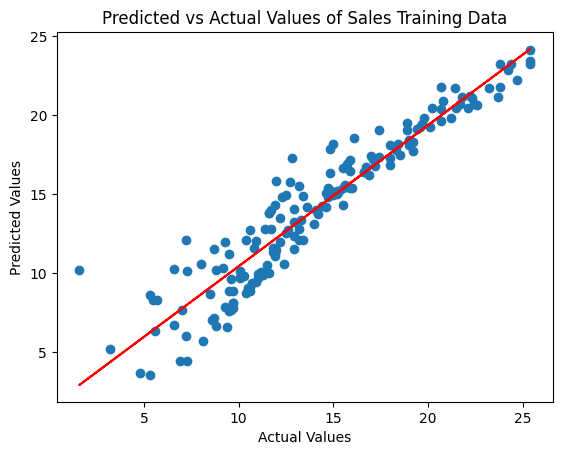

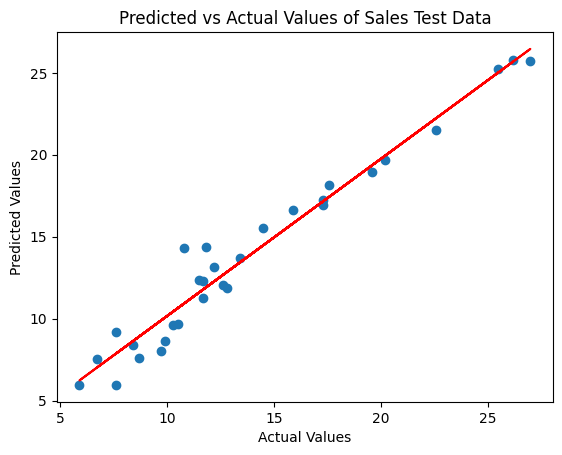

In [374]:
def plot_predicted_and_data(y_predicted, y_actual, title):

  plt.pyplot.scatter(x=y_actual, y=y_predicted)
  slope, intercept = np.polyfit(y_actual, y_predicted, 1)
  regression_line = slope * y_actual + intercept

  plt.pyplot.plot(y_actual, regression_line, color="red")
  plt.pyplot.ylabel("Predicted Values")
  plt.pyplot.xlabel("Actual Values")
  plt.pyplot.title(title)
  plt.pyplot.show()

plot_predicted_and_data(train_destandardized_predicted, training_data_destandardized['Sales'], "Predicted vs Actual Values of Sales Training Data")
plot_predicted_and_data(test_destandardized_predicted, test_data_destandardized['Sales'], "Predicted vs Actual Values of Sales Test Data")

In [375]:
from sklearn.metrics import r2_score

print(f"R^2 score is {r2_score(y_train, y_predicted_train)}")

R^2 score is 0.8919516182718155


# Question 3
**What happens to the error, r2, and cost as the number of iterations increase? Show your
data and proof. You can alternatively plot your result data for visualization and check
until 50000 iterations or more (actually)**


As the number of iterations increase, the training set error and cost decrease. Conversely, the r2 score increases as the number of iterations increase. A similar trend can be seen in the test set.

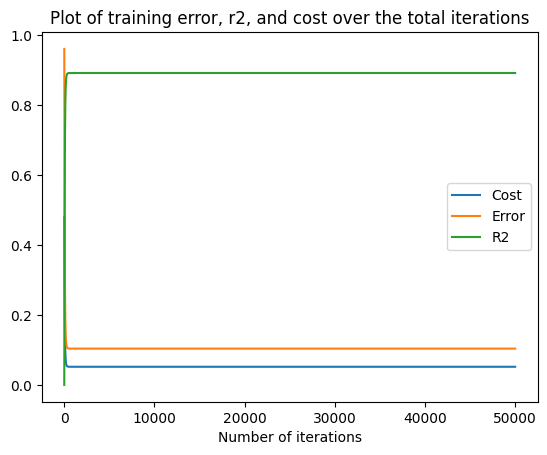

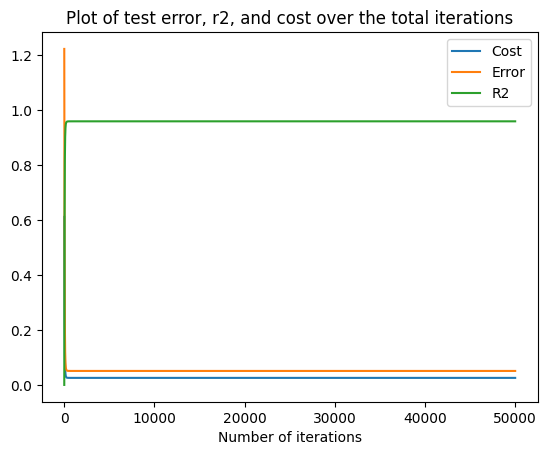

In [376]:
def plot_cost_error_r2(cost_matrix: pd.DataFrame, error_r2_history: pd.DataFrame, title:str) -> None:
  x = cost_matrix["Iterations"]
  plt.pyplot.plot(x, cost_matrix["Cost"], label="Cost")
  plt.pyplot.plot(x, error_r2_history["MSE"], label="Error")
  plt.pyplot.plot(x, error_r2_history["R2"], label="R2")
  plt.pyplot.legend()
  plt.pyplot.xlabel("Number of iterations")
  plt.pyplot.title(title)
  plt.pyplot.show()

plot_cost_error_r2(cost_matrix_train, error_r2_df_train, "Plot of training error, r2, and cost over the total iterations")
plot_cost_error_r2(cost_matrix_test, error_r2_df_test, "Plot of test error, r2, and cost over the total iterations")

# Question 4
**Once you determine the optimal number of iterations, check the effect on the cost and
error as you change the learning rate. The common learning rates in machine learning
include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize
the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE
PLOT. Provide your analysis.**



I have created a function to determine convergence. I have set the threshold arbitrarily at 0.0000001. I calculated the difference of the error of any iteration from its next iteration's error. This determined Iteration 737 to be the point where convergence is reached. From the scatterplot below, it seems that learning rate actually has a significant impact in the speed of the model in reaching convergence. A 10% decrease in the learning drastically changes the curve of the cost function. At alpha = 0.0001, the cost function is almost a straight line with a relative low slope.


In [377]:
def determine_convergence(cost_matrix: pd.DataFrame, threshold: float) -> int:
  df = cost_matrix.copy()
  df['Error difference'] = df["MSE"].diff()
  df = df.dropna()
  optimal_iteration = df.loc[abs(df["Error difference"]) <= threshold]
  return int(optimal_iteration.iloc[0]["Iteration"])

optimal_iterations = determine_convergence(error_r2_df_train, 0.0000001)
optimal_iterations

737

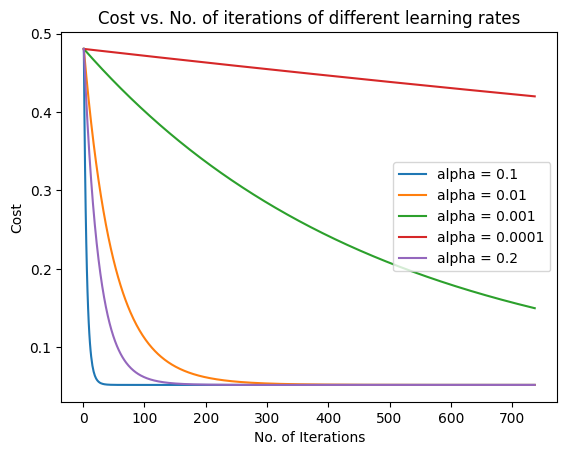

In [378]:

def plot_costs_multiple(x, dfs, labels):

  for df, label in zip(dfs, labels):
    plt.pyplot.plot(x, df["Cost"], label=label)


  plt.pyplot.legend()
  plt.pyplot.ylabel("Cost")
  plt.pyplot.xlabel("No. of Iterations")
  plt.pyplot.title("Cost vs. No. of iterations of different learning rates")

init_w = np.array([0.0, 0.0, 0.0, 0.0])
cost_matrix_0_1, weights_train = grad_descent(optimal_iterations, init_w, training_data, 0.1)
cost_matrix_0_01, weights_train = grad_descent(optimal_iterations, init_w, training_data, 0.01)
cost_matrix_0_001, weights_0_001 = grad_descent(optimal_iterations, init_w, training_data, 0.001)
cost_matrix_0_0001, weights_0_0001 = grad_descent(optimal_iterations, init_w, training_data, 0.0001)
cost_matrix_0_2, weights_0_2 = grad_descent(optimal_iterations, init_w, training_data, 0.02)
plot_costs_multiple(cost_matrix_0_1["Iterations"], [cost_matrix_0_1, cost_matrix_0_01, cost_matrix_0_001, cost_matrix_0_0001, cost_matrix_0_2], ["alpha = 0.1", "alpha = 0.01", "alpha = 0.001", "alpha = 0.0001", "alpha = 0.2"])




# Question 5
**Is there a relationship on the learning rate and the number of iterations**

As seen from the plot above, the lower the learning rate, the slower that the model reaches convergence. An alpha level of 0.1 was the fastest to reach convergence and the alpha rate of 0.0001 was the slowest to reach convergence.

# Question 6
**Compare the results with the results of ordinary least squares function.**


After 737 iterations at a learning rate of 0.01, the results of the gradient descent implementation compares well with the results of OLS. The MSE and R2 scores of each are close (OLS R2 = 0.8919516182718155, GD R2 = 0.8919440787565664; OLS MSE = 0.10381323065905963, GD MSE = 0.1038204746494192). From this, it can be concluded that Gradient Descent can perform as well as OLS.




OLS R2 is: 0.8919516182718155
OLS MSE is: 0.10381323065905963


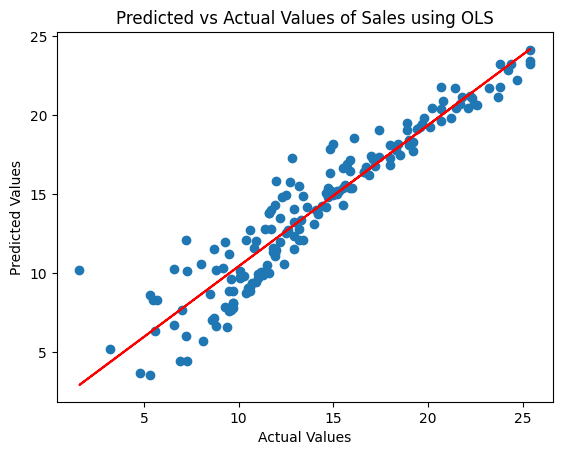

In [379]:
from sklearn.linear_model import LinearRegression

x_train_standardized = training_data[["TV", "Radio", "Newspaper"]]
y_train_standardized = training_data["Sales"]
reg = LinearRegression()
model = reg.fit(x_train_standardized, y_train_standardized)
ols_predicted = model.predict(x_train_standardized)
ols_r2 = reg.score(x_train_standardized, y_train_standardized)
ols_mse = mean_squared_error(y_train_standardized, ols_predicted)

print(f"OLS R2 is: {ols_r2}")
print(f"OLS MSE is: {ols_mse}")
plot_predicted_and_data(destandardize(ols_predicted, sales_std, sales_mean), destandardize(training_data["Sales"], sales_std, sales_mean), "Predicted vs Actual Values of Sales using OLS")

Grad Descent R2 is: 0.8919440787565664
Grad Descent MSE is: 0.1038204746494192


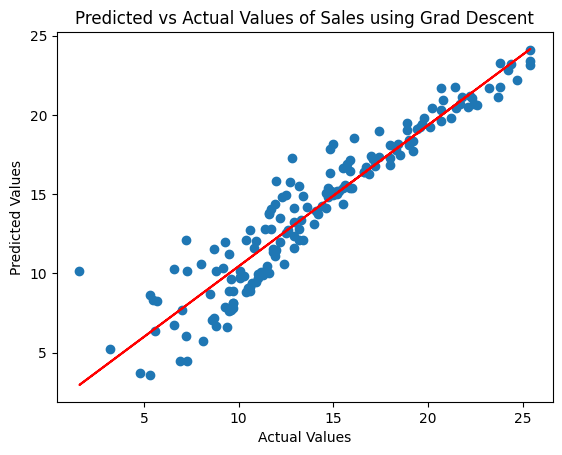

In [380]:
# from sklearn.metrics import mean_squared_error
optimal_cost_matrix, optimal_weights = grad_descent(737, np.array([0.0,0.0,0.0,0.0]), training_data, 0.01)
y_predicted_optimal_train = predict(x_train, optimal_weights)
destandardized_predicted =  destandardize(y_predicted_optimal_train, sales_std, sales_mean)
destandardized_actual =  destandardize(training_data["Sales"], sales_std, sales_mean)

destandardized_predicted
optimal_r2 = r2_score(training_data["Sales"], y_predicted_optimal_train)
optimal_mse = mean_squared_error(training_data["Sales"], y_predicted_optimal_train)


print(f"Grad Descent R2 is: {optimal_r2}")
print(f"Grad Descent MSE is: {optimal_mse}")
plot_predicted_and_data(destandardized_predicted, destandardized_actual, "Predicted vs Actual Values of Sales using Grad Descent")

